In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camdesign as cd
import pandas as pd

# Datos de entrada

In [2]:
def f_leva(valor): #0.8 0.4
    A_leva = np.pi*0.8*2
    A_piasada = np.pi*0.4*2
    return (valor/A_leva)*A_piasada

def Desplazamiento(valor):
    return valor/(30*0.6**4*np.pi**2)

def RadioLeva(valor):
    return valor + 2

In [3]:
f_pisada = [0, 113, 80, 108, 0, 0]
grados = [0, 57, 125, 200, 260, 360]
desplazamiento = [0, 0, 0, 0, 0, 0]

dict = {'Grados':grados,
        'Fuerza de la pisada - lb':f_pisada}
df_datos = pd.DataFrame(dict)
df_datos['Fuerza de la leva - lb'] = df_datos['Fuerza de la pisada - lb'].apply(f_leva)
df_datos['Desplazamiento'] = df_datos['Fuerza de la leva - lb'].apply(Desplazamiento)
df_datos['Radio de la leva'] = df_datos['Desplazamiento'].apply(RadioLeva)

df_datos

,Grados,Fuerza de la pisada - lb,Fuerza de la leva - lb,Desplazamiento,Radio de la leva
0,0,0,0.0,0.000000,2.000000
1,57,113,56.5,1.472389,3.472389
2,125,80,40.0,1.042399,3.042399
3,200,108,54.0,1.407239,3.407239
4,260,0,0.0,0.000000,2.000000
5,360,0,0.0,0.000000,2.000000


In [4]:
L1 = df_datos.loc[1,'Desplazamiento']
L2 = df_datos.loc[2,'Desplazamiento']
L3 = df_datos.loc[3,'Desplazamiento'] 
L1_2 = L1 - L2
L2_3 = L3 - L2

# Gráficas

In [110]:
def GraficaSVAJ(tipo,ejeY,ruta = './img/grafica.png'):
    x = np.linspace(0,0.5, 361)

    if tipo == 'S':
        d = 0
        unidades = 'in'
        titulo = 'desplazamiento'
    elif tipo == 'V':
        d = 1
        unidades = 'in/s'
        titulo = 'velocidad'
    elif tipo == 'A':
        d = 2
        unidades = 'in/s**2'
        titulo = 'aceleración'
    elif tipo == 'J':
        d = 3
        unidades = 'in/s**3'
        titulo = 'jerk'

    y1 = cd.CicloidalT(L1, x[0:57], 0.0789, "ascenso", d)
    y2 = cd.CicloidalT(L1_2,x[0:68],0.0942, "descenso", d)
    y3 = cd.CicloidalT(L2_3,x[0:75],0.1039, "ascenso", d)
    y4 = cd.CicloidalT(L3,x[0:60],0.0831, "descenso", d)
    y5 = np.zeros(101)

    if tipo == 'S':
        y = np.concatenate([y1, y2 + L2, y3 + L2, y4, y5])
    else:
        y = np.concatenate([y1, y2, y3, y4, y5])

    plt.figure(figsize=(10, 3))
    plt.plot(x, y)

    a,b,c = ejeY
    plt.gca().yaxis.grid(True, which='both', linestyle='-')
    plt.gca().set_yticks(np.linspace(a,b,c), minor=True)
    plt.yticks(np.linspace(a,b,int(c/2+1)))

    plt.gca().xaxis.grid(True, which='both', linestyle='-')
    plt.gca().set_xticks(np.linspace(0,0.5,11), minor=True)
    plt.axhline(0, color='black', linewidth=0.5)
    

    plt.xlabel('s')
    plt.ylabel(unidades)

    plt.title(f'Gráfica de {titulo} por movimiento cicloidal')
    plt.savefig(ruta)
    plt.show()

## Gráfica S 

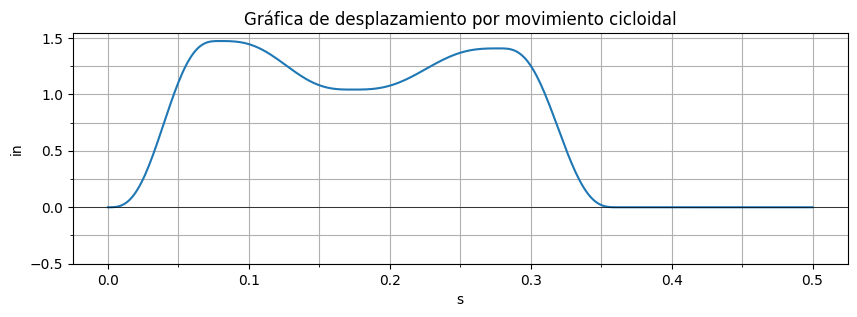

In [113]:
GraficaSVAJ('S', (-0.5,1.5,9), ruta = './img/plot-py_S.png')

## Gráfica V 

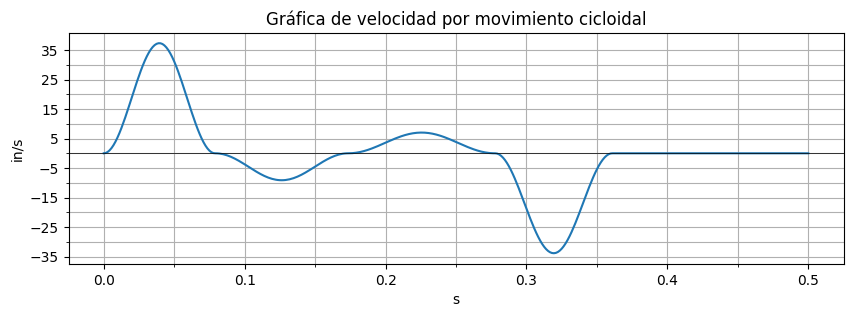

In [114]:
GraficaSVAJ('V', (-35,35,15), ruta = './img/plot-py_V.png')

## Gráfica A

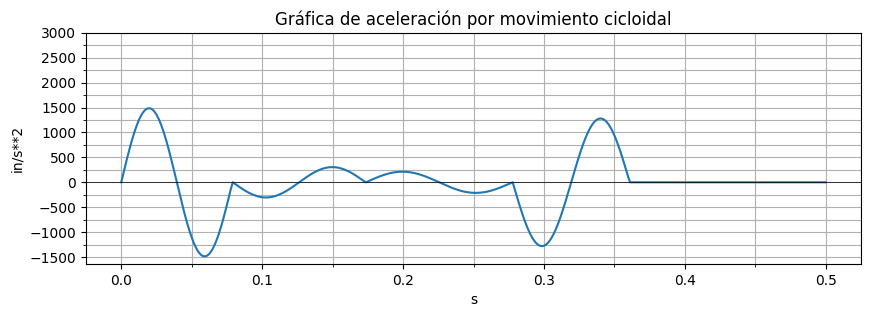

In [115]:
GraficaSVAJ('A', (-1500,3000,19), ruta = './img/plot-py_A.png')

## Gráfica J

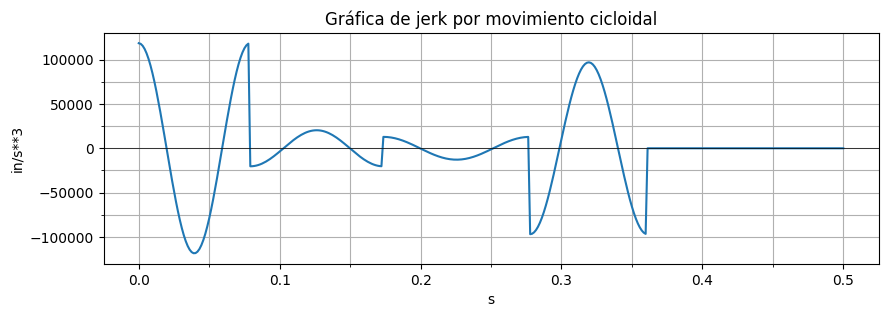

In [116]:
GraficaSVAJ('J', (-100000,100000,9), ruta = './img/plot-py_J.png')